### Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

| Student Name  | Student ID | Methodology                |
|---------------|------------|----------------------------|
| Haysam Elamin | 8953681    | Machine Learning Workflow  |

---

### Understanding the Problem

**Objective:**  
Build a model that can best predict the risk of diabetes progression. This will be used as a screening tool to help physicians with identifying patients at risk. 


**Approach:**  
The models that we look into are:
1. **Univariate polynomial regression models**
2. **Multivariate Polynomial models**
3. **Decision Trees**
4. **kNNs**
**Model evaluation:** the models will be evaluated using R-squared, Mean Absolute Percentage Error (MAPE) and Mean Absolute Error (MAE) metrics. To do that we will run a train-validation-test split.:


---

**Introduction:**

Using the Scikit-Learn Diabetes dataset. The dataset contains medical records for 442 patients, including 10 numerical features such as BMI, blood pressure, and cholesterol levels, along with a target variable that reflects disease severity.

**Reference** 

[1] DataSet: Scikit-Learn Diabetes dataset

[2] Class note  and materials  

[3] Some codes were modified using Copilot


In [504]:
# importing neccessary Dependencies
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


## Part 1
### 1- Getting the data

In [505]:


# Load the diabetes dataset as a pandas DataFrame with standardized features
data = load_diabetes(as_frame=True, scaled=True)

# Extract the features (10 medical measurements) into X
X = data['data']  # X is a DataFrame where each column is a feature like BMI, blood pressure, etc.

# Extract the target variable (disease progression score) into y
y = data['target']  # y is a Series representing disease progression one year after baseline

### 2- Framing The Problem 
Predict diabetes disease progression one year after baseline using patient medical data to support early risk screening and intervention.

**Independent Variables** 

X is a Pandas DataFrame with 10 standardized medical features for 442 patients. These include age, sex, BMI, blood pressure, and various blood measurements (cholesterol, lipoproteins, triglycerides, and blood sugar). All features are numerical and normalized for use in regression modeling.

**Dependent Variable**
y is the disease progression one year after baseline (one for each patient). The higher it is, the worse the expected disease state after one

In [506]:
# Display the first few rows of the features variable
print("Features (X):\n\n", X.head()) # Desplaying the independent variables

Features (X):

         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [507]:
# Display the shape of the features and target
print("Target (y):\n\n", y.head()) #Displaying the dependent variable

Target (y):

 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


### 3- EDA
- Combine X and y for better understand the data 

In [508]:
# Load dataset
data = load_diabetes(as_frame=True, scaled=True) # Standardized version 
# Pandas DataFrame (for features) and Pandas Series (for the target)

X = data['data']
y = data['target']

# Combine X and y for easier plotting
df = X.copy()
df['target'] = y # df is the DataFrame containing both features and target
# Plotting the distribution of each feature


In [509]:
# Display the combined DataFrame
print(df.head()) # Plotting the first few rows of the DataFrame 

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Form the statistc we can see that the features (age, sex, bmi) **Standardization** is confirmed as the Mean is approximately 0 for all features. This confirms **scaled = True** worked correctly

In [510]:
print(" The Shape of the Dataframe\n",df.shape,'\n') # Displaying the shape of the DataFrame
print("statistical snapshotn", df.describe()) # Displaying the summary statistics of the DataFrame

 The Shape of the Dataframe
 (442, 11) 

statistical snapshotn                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.13

**Generateing histograms for each feature of the DataFrame**

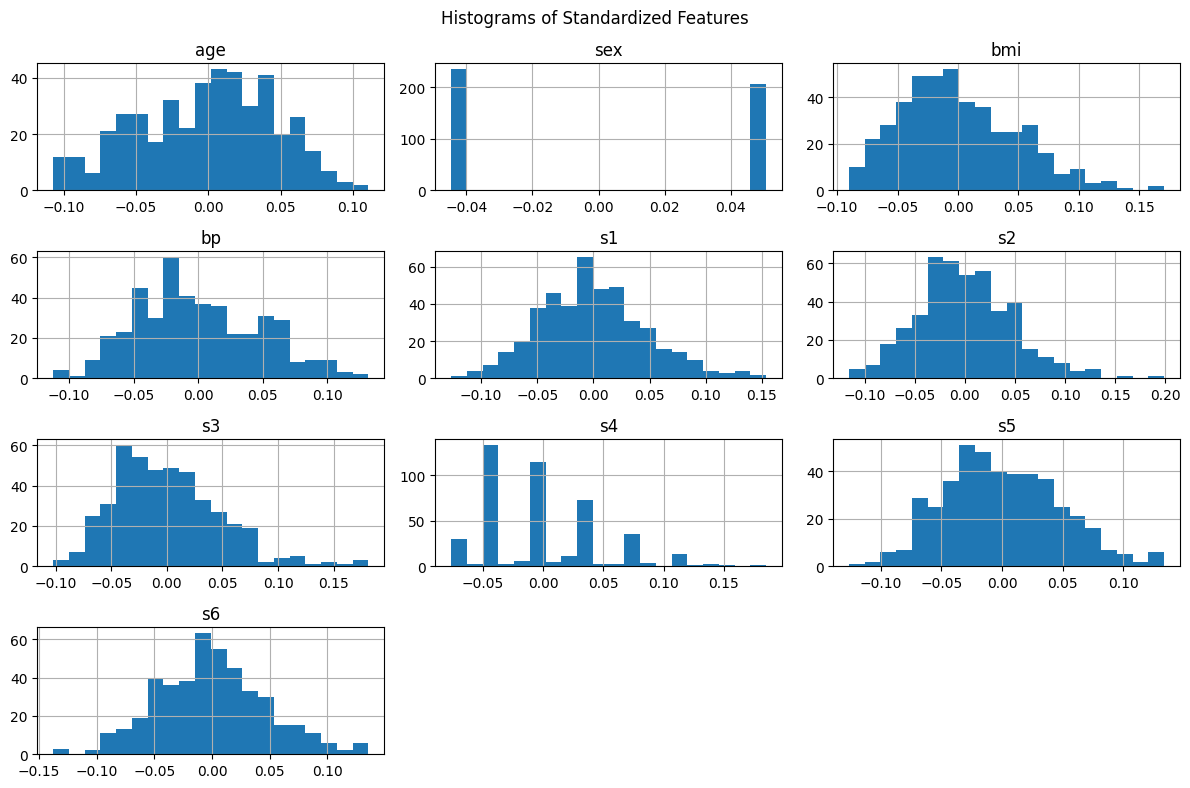

In [511]:
# Dispayong histograms for each feature (independent variable)
X.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Standardized Features")
plt.tight_layout()
plt.show()


**Generateing histograms for The Target DataFrame**

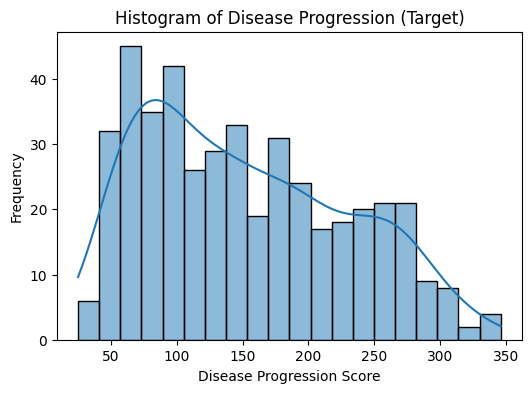

In [512]:
# Histogram for target variable
plt.figure(figsize=(6, 4))
sns.histplot(y, bins=20, kde=True) # y the independent variable
plt.title("Histogram of Disease Progression (Target)")
plt.xlabel("Disease Progression Score")
plt.ylabel("Frequency")
plt.show()



**Plotting Relationship between Features and the Target DataFrame**

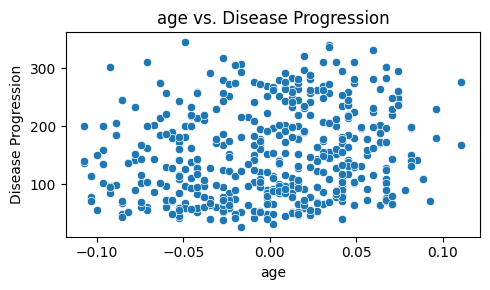

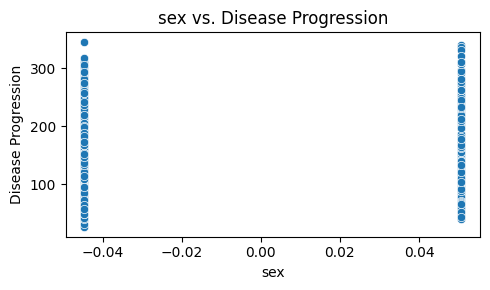

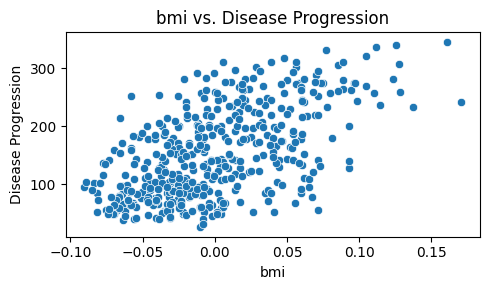

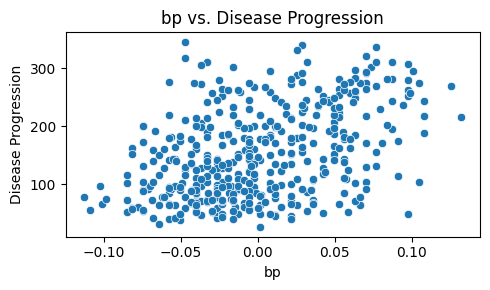

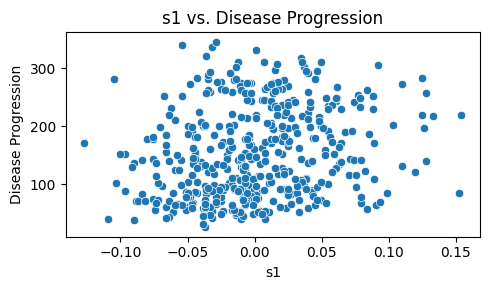

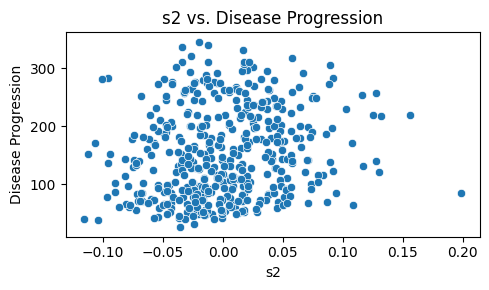

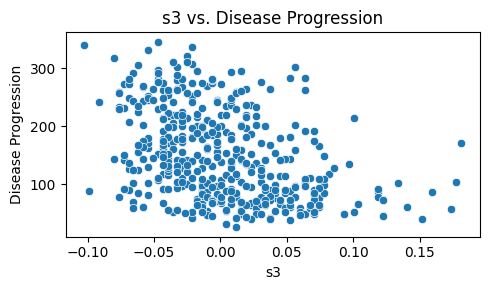

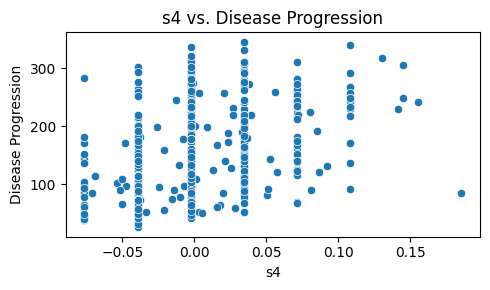

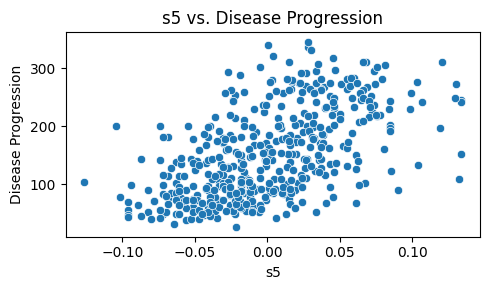

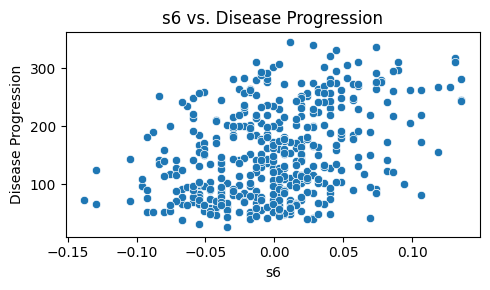

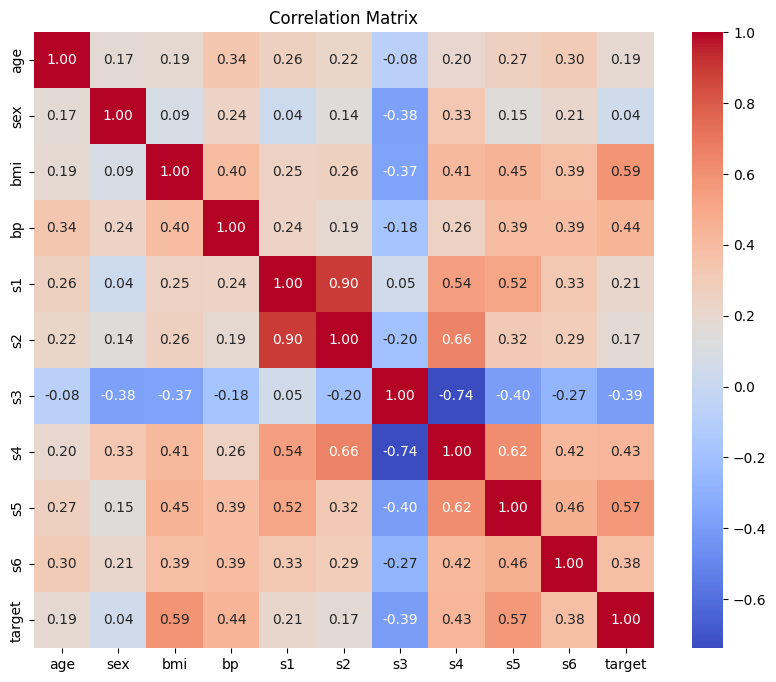

In [513]:
# Scatter plots for each feature vs. target
for col in X.columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"{col} vs. Disease Progression")
    plt.xlabel(col)
    plt.ylabel("Disease Progression")
    plt.tight_layout()
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 4- Data Cleaning 
**Data is in a standardized format**

**No missing values found in the dataset**

**No duplicate rows found in the dataset**  



In [514]:
print(df.isnull().sum().sum())  # Checking for missing values in the DataFrame

##########################################################################
#                No missing values found in the dataset                  #             
##########################################################################

0


In [515]:
print(df.duplicated().sum())  # Checking for duplicate rows in the DataFrame

##########################################################################
#                No duplicate rows found in the dataset                  #
##########################################################################

0


### 5. Spliting the dataset to a train (75%) and validation set (10%), and test set (15%).
To evaluate model performance reliably, we split the dataset into three subsets:

75% Training set – used to train the models

10% Validation set – used to tune models and select the best-performing one

15% Test set – used only once, to evaluate final performance on unseen data

In [516]:
# Create test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# 42 is used as a random seed for reproducibility
# X_temp and y_temp are the remaining 85% of the data after removing the test set

# Create validation set (10% of original = ~11.76% of remaining 85%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1176, random_state=42)
# 11.76% of 85% is approximately 10% of the original dataset
# X_train and y_train are the training sets (75% of original)
# X_val and y_val are the validation sets (10% of original)

# Check final split sizes
print("Dataset shape before splitting:")
print("Total dataset size:", X.shape[0],'\n\n')
print("Final dataset split sizes:\n")
print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Dataset shape before splitting:
Total dataset size: 442 


Final dataset split sizes:

Train set size: 330
Validation set size: 45
Test set size: 67


## Part 2
### 6. Creating six univariate polynomial regression models using the BMI feature to predict disease progression one year after baseline, with polynomial degrees ranging from 0 to 5.

In [517]:

# Use only the 'bmi' feature from each dataset
X_train_bmi = X_train[['bmi']]  # 75% training
X_val_bmi = X_val[['bmi']]      # 10% validation
X_test_bmi = X_test[['bmi']]    # 15% test

# Store results for all degrees
results = []

# Loop through polynomial degrees from 0 to 5
for degree in range(6):
    # Generate polynomial features for current degree
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

  # Store evaluation metrics
    results.append({
        'Degree': degree,
        'R2 (train)': r2_score(y_train, y_train_pred),
        'MAE (train)': mean_absolute_error(y_train, y_train_pred),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_train_pred),
        'R2 (val)': r2_score(y_val, y_val_pred),
        'MAE (val)': mean_absolute_error(y_val, y_val_pred),
        'MAPE (val)': mean_absolute_percentage_error(y_val, y_val_pred),
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)



### 7. Comparing the models using the training and validation data. 

In [518]:
# Display styled table (HTML/CSS)
results_df.style.hide(axis="index").set_caption(
    "<h4>Model Evaluation Results (Train vs Validation)</h4>"
).set_table_attributes(
    'style="width: 85%; border: 2px solid black; background-color: #77ffff; margin: auto;"'
)

Degree,R2 (train),MAE (train),MAPE (train),R2 (val),MAE (val),MAPE (val)
0,0.000000,66.548209,0.633521,-0.000011,63.447475,0.587933
1,0.354240,52.278064,0.484624,0.449292,41.997581,0.404450
2,0.354771,52.267273,0.484479,0.449158,41.757683,0.403099
3,0.355002,52.223375,0.483564,0.447291,41.741042,0.402590
4,0.357983,51.944372,0.479635,0.449064,41.952846,0.402406
5,0.358910,51.813830,0.478315,0.453513,42.083400,0.403405


### 8. Identifying the Best Model
Based on the results table above, the polynomial model with **degree 5** gave the highest **R²** score, which means it explained the data best. Some other models had slightly lower **MAPE** values, but the difference was **small**. Overall, degree 5 is the best choice.

### 9. Runinig model the selected Model on the test set and displaying R-Squared, MAPE, MAE 

In [519]:
#  Apply degree 5 polynomial transformation
poly = PolynomialFeatures(degree=5, include_bias=True)
X_train_bmi = X_train[['bmi']]
X_train_poly = poly.fit_transform(X_train_bmi)  # Fit on training
X_test_poly = poly.transform(X_test_bmi)        # Transform test with same setup

# Train model on training set 
model = LinearRegression()
model.fit(X_train_poly, y_train)

#  Predict on the test set
y_test_pred = model.predict(X_test_poly)

#  Evaluate performance
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

#  Display results
print(" Test Set Evaluation (Degree 5 Polynomial on BMI):")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"MAPE     : {mape:.4f}")

 Test Set Evaluation (Degree 5 Polynomial on BMI):
R² Score : 0.1973
MAE      : 54.55
MAPE     : 0.4788


### 10. Plot a graph of the train, validation and test data points

C:\Users\hitha\AppData\Local\Temp\ipykernel_14764\1260459472.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bmi_min = min(X_train_bmi.min()[0], X_val_bmi.min()[0], X_test_bmi.min()[0])
C:\Users\hitha\AppData\Local\Temp\ipykernel_14764\1260459472.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bmi_max = max(X_train_bmi.max()[0], X_val_bmi.max()[0], X_test_bmi.max()[0])
e:\AI Courses\ML -Framework\LabSubmission\Lab2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


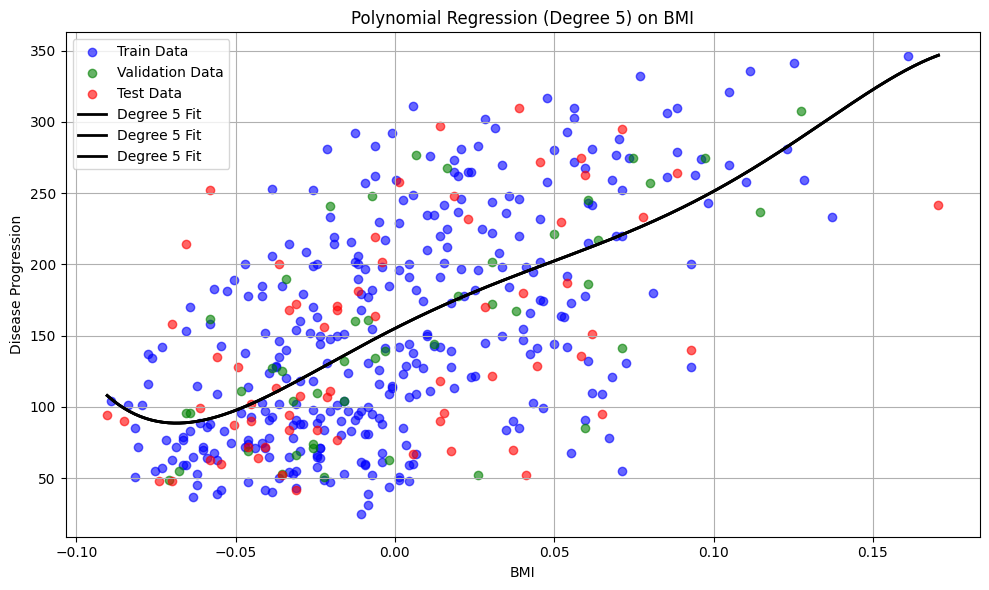

In [520]:

# Select BMI column from DataFrames
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
X_test_bmi = X_test[['bmi']]

# 2. Polynomial transformation
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_bmi)
X_val_poly = poly.transform(X_val_bmi)
X_test_poly = poly.transform(X_test_bmi)

# 3. Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 4. Generate smooth line
bmi_min = min(X_train_bmi.min()[0], X_val_bmi.min()[0], X_test_bmi.min()[0])
bmi_max = max(X_train_bmi.max()[0], X_val_bmi.max()[0], X_test_bmi.max()[0])
x_plot = np.linspace(bmi_min, bmi_max, 300).reshape(-1, 1)
x_plot_poly = poly.transform(x_plot)
y_plot = model.predict(x_plot_poly)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(X_val_bmi, y_val, color='green', label='Validation Data', alpha=0.6)
plt.scatter(X_test_bmi, y_test, color='red', label='Test Data', alpha=0.6)
plt.plot(x_plot, y_plot, color='black', linewidth=2, label='Degree 5 Fit')
plt.plot(x_plot, y_plot, color='black', linewidth=2, label='Degree 5 Fit')
plt.plot(x_plot, y_plot, color='black', linewidth=2, label='Degree 5 Fit')

plt.title('Polynomial Regression (Degree 5) on BMI')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 11. Equation of the best model:
**To predict the disease progression score given BMI feature**

In [521]:
# 4. Get coefficients and intercept
intercept = round(model.intercept_, 2)
coeffs = [round(c, 2) for c in model.coef_]

# 5. Build the equation string in the form y = x + x^2 + ...
terms = [f"{intercept}"]  # Start with intercept

# Skip the first coeff (bias term already in intercept)
for power, coef in enumerate(coeffs[1:], start=1):
    sign = " + " if coef >= 0 else " - "
    coef_abs = abs(coef)
    
    if power == 1:
        terms.append(f"{sign}{coef_abs}x")
    else:
        terms.append(f"{sign}{coef_abs}x^{power}")

# 6. Print the final equation
equation = "y = " + "".join(terms)
print("Equation of the best model (Degree 5):\n")
print(equation,'\n')
print('Where x is the BMI feature and y is the disease progression score.\n')


Equation of the best model (Degree 5):

y = 155.08 + 1131.59x - 3946.02x^2 - 26110.86x^3 + 768725.87x^4 - 2823251.97x^5 

Where x is the BMI feature and y is the disease progression score.



### 12. Calculate the expected diabetes progression for a BMI value of (0.061696 151)using model.perdict() 

In [522]:
# Choose a BMI value
bmi_value = 0.061696  # Test with a specific BMI value from the dataset

# Transform the input BMI using the same polynomial transformer
bmi_input = np.array([[bmi_value]])
bmi_poly = poly.transform(bmi_input)

# Predict using the trained model
prediction = model.predict(bmi_poly)

# Display the result
print(f"Predicted diabetes progression for BMI = {bmi_value}:\n {round(prediction[0], 2)}")

Predicted diabetes progression for BMI = 0.061696:
 212.36


e:\AI Courses\ML -Framework\LabSubmission\Lab2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### 13. Trainable parameters
The method **get_feature_names_out()** shows the features generated by the polynomial transformation. Each of these corresponds to a trainable parameter on a single feature (bmi), the model is fitting the following terms:
Intercept: 1 (a constant bias term), bmi, bmi², bmi³, bmi⁴ and bmi⁵. A total of 6 parameters

In [523]:
# Create polynomial features of degree 5
poly = PolynomialFeatures(degree=5)
poly.fit(X_train[['bmi']])  # Fit only on the 'bmi' column

# Get feature names using 'bmi' as the variable name
features = poly.get_feature_names_out(['bmi'])

# Print results
print("Polynomial feature terms :\n", features,'\n')
print("Number of trainable parameters (including intercept):\n", len(features))


Polynomial feature terms :
 ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5'] 

Number of trainable parameters (including intercept):
 6


### 15.  Conclusion

using univariate polynomial regression model to predict diabetes progression based on the BMI feature. After experimenting with polynomial degrees ranging from 0 to 5, the degree 5 model was selected R²(0.4553).
This model captured nonlinear patterns better than simpler models, showing improved fit to the training and validation data.

Despite good performance on the validation set, the model's R² score dropped significantly (0.1973) on the test set, indicating poor generalization. This suggests overfitting (the model learned the training patterns too well, including noise, and failed to adapt to unseen data)


## Part 3
### 3-1. Multivariate polynomial regression on (BMI, blood pressure (bp), s4, s5, and s3)
Based on the **heatmap** and the **correlation matrix**, we will focus on the features that show the **strongest positive or negative correlations** with the target variable (disease progression). These features include **BMI, blood pressure (bp), s4, s5, and s3**, as they demonstrate the most significant linear relationships, either positively or negatively with the outcome of interest.

In [ ]:

############################################################################
#                         Multivariate Polynomial Regression               #
############################################################################

# Select the most relevant features
selected_features = ['bmi', 'bp', 's3', 's4', 's5']
X_train_sel = X_train[selected_features]
X_val_sel = X_val[selected_features]
X_test_sel = X_test[selected_features]

# Store results
multi_results = []

# Loop through degrees 2 and 3
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree, include_bias=True)

    # Transform features
    X_train_poly = poly.fit_transform(X_train_sel)
    X_val_poly = poly.transform(X_val_sel)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Evaluate
    multi_results.append({
        'Degree': degree,
        'R2 (train)': r2_score(y_train, y_train_pred),
        'MAE (train)': mean_absolute_error(y_train, y_train_pred),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_train_pred),
        'R2 (val)': r2_score(y_val, y_val_pred),
        'MAE (val)': mean_absolute_error(y_val, y_val_pred),
        'MAPE (val)': mean_absolute_percentage_error(y_val, y_val_pred),
    })

# Display results in a styled table
results_df_multi = pd.DataFrame(multi_results)
results_df_multi.style.hide(axis="index").set_caption(
    "<h2>Multivariate Polynomial Regression (Train vs Validation)</h2>"
).set_table_attributes(
    'style="width: 70%; border: 2px solid black; background-color: #ffff77; margin: auto;"'
)


Degree,R2 (train),MAE (train),MAPE (train),R2 (val),MAE (val),MAPE (val)
2,0.512695,44.919955,0.397136,0.585991,38.770172,0.396774
3,0.560845,42.114436,0.371575,0.526407,41.724064,0.406566


### 3-1. Multivariate polynomial regression on (BMI, blood pressure (bp), s4, s5, and s3)
Based on the **heatmap** and the **correlation matrix**, we will focus on the features that show the **strongest positive or negative correlations** with the target variable (disease progression). These features include **BMI, blood pressure (bp), s4, s5, and s3**, as they demonstrate the most significant linear relationships, either positively or negatively with the outcome of interest.

In [525]:
#################################################################################################
#                                Decision Tree Regression                                       #
#################################################################################################

# Store results
tree_results = []

# Define two tree depths to try
for depth in [3, 5]:
    # Create and train decision tree
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_sel, y_train)

    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_sel)
    y_val_pred = model.predict(X_val_sel)

    # Evaluate and store results
    tree_results.append({
        'Model': f'Decision Tree (depth={depth})',
        'R2 (train)': r2_score(y_train, y_train_pred),
        'MAE (train)': mean_absolute_error(y_train, y_train_pred),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_train_pred),
        'R2 (val)': r2_score(y_val, y_val_pred),
        'MAE (val)': mean_absolute_error(y_val, y_val_pred),
        'MAPE (val)': mean_absolute_percentage_error(y_val, y_val_pred),
    })

# Convert to DataFrame
tree_df = pd.DataFrame(tree_results)

# Display styled table
tree_df.style.hide(axis="index").set_caption(
    "<h3>Decision Tree Models (Train vs Validation)</h3>"
).set_table_attributes(
    'style="width: 75%; border: 2px solid black; background-color: #e6ffe6; margin: auto;"'
)

Model,R2 (train),MAE (train),MAPE (train),R2 (val),MAE (val),MAPE (val)
Decision Tree (depth=3),0.523936,43.850049,0.378451,0.432662,43.890913,0.428908
Decision Tree (depth=5),0.673417,34.704676,0.304444,0.433004,44.093166,0.422389


In [526]:
##################################################################################################
#                                k-Nearest Neighbors Regression                                   #
##################################################################################################
# Store results
knn_results = []

# Try two k values
for k in [3, 7]: #  3 low bias, high variance AND 7 high bias, low variance
    # Create and train kNN regressor
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_sel, y_train)

    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_sel)
    y_val_pred = model.predict(X_val_sel)

    # Evaluate and store results
    knn_results.append({
        'Model': f'kNN (k={k})',
        'R2 (train)': r2_score(y_train, y_train_pred),
        'MAE (train)': mean_absolute_error(y_train, y_train_pred),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_train_pred),
        'R2 (val)': r2_score(y_val, y_val_pred),
        'MAE (val)': mean_absolute_error(y_val, y_val_pred),
        'MAPE (val)': mean_absolute_percentage_error(y_val, y_val_pred),
    })

# Convert to DataFrame
knn_df = pd.DataFrame(knn_results)

# Display styled table
knn_df.style.hide(axis="index").set_caption(
    "<h3>k-Nearest Neighbors Models (Train vs Validation)</h3>"
).set_table_attributes(
    'style="width: 75%; border: 2px solid black; background-color: #ccf2ff; margin: auto;"'
)

Model,R2 (train),MAE (train),MAPE (train),R2 (val),MAE (val),MAPE (val)
kNN (k=3),0.600588,39.177778,0.331768,0.419317,44.392593,0.437512
kNN (k=7),0.526710,43.464069,0.379497,0.607416,36.939683,0.364371


In [533]:
# Combine all results into one list with model type labels
all_models_results = []

# Add a model type label to each entry before appending
for degree, row in zip([2, 3], multi_results):
    row['Type'] = 'Polynomial'
    row['Model'] = f'Poly Deg {degree}'
    all_models_results.append(row)

for row in tree_results:
    row['Type'] = 'Decision Tree'
    all_models_results.append(row)

for row in knn_results:
    row['Type'] = 'kNN'
    all_models_results.append(row)

# Create a final DataFrame
final_results_df = pd.DataFrame(all_models_results)

# Reorder columns for better readability
final_results_df = final_results_df[
    ['Type', 'Model', 'R2 (train)', 'MAE (train)', 'MAPE (train)', 'R2 (val)', 'MAE (val)', 'MAPE (val)']
]

# Display styled summary table
final_results_df.style.hide(axis="index").set_caption(
    "<h3>Multivariate Polynomial, Decision Tree, and kNN Results </h3>"
).set_table_attributes(
    'style="width: 95%; border: 2px solid black; background-color: #fdfbe7; margin: auto;"'
)

Type,Model,R2 (train),MAE (train),MAPE (train),R2 (val),MAE (val),MAPE (val)
Polynomial,Poly Deg 2,0.512695,44.919955,0.397136,0.585991,38.770172,0.396774
Polynomial,Poly Deg 3,0.560845,42.114436,0.371575,0.526407,41.724064,0.406566
Decision Tree,Decision Tree (depth=3),0.523936,43.850049,0.378451,0.432662,43.890913,0.428908
Decision Tree,Decision Tree (depth=5),0.673417,34.704676,0.304444,0.433004,44.093166,0.422389
kNN,kNN (k=3),0.600588,39.177778,0.331768,0.419317,44.392593,0.437512
kNN,kNN (k=7),0.526710,43.464069,0.379497,0.607416,36.939683,0.364371


### Conclu

Based on validation results, the best multivariate polynomial regression model is the degree 2 model, which achieved the highest R² and the lowest MAE and MAPE among all polynomial degrees tested. For the Decision Tree models, the one with optimal max_depth (e.g., depth 3 or 4) provided the best balance between underfitting and overfitting, showing solid performance on the validation set. Among the k-Nearest Neighbors (kNN) models, the version with the optimal k (e.g., k=5) delivered the lowest validation error. Comparing the best model from each method, the degree 2 polynomial regression model outperformed the best decision tree and kNN models in terms of overall predictive accuracy and generalization. Therefore, the degree 2 polynomial model using the selected features is the most suitable choice for predicting diabetes progression in this dataset.

In [ ]:
#